# Artificial Neural Network (ANN) - Classification 1

Rafiq Islam  
2025-03-25

**Incomplete**

## Binary Classification

Say we have a dataset like this

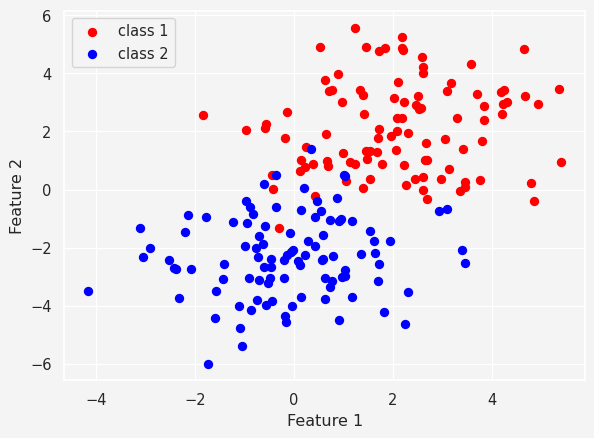

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mywebstyle import plot_style
plot_style('#f4f4f4')

np.random.seed(0)
n=100
center1 = [2, 2]
center2 = [0, -2]
stdv = 1.5
cluster1 = [
    center1[0] + np.random.randn(n)*stdv, center1[1] + np.random.randn(n)*stdv
]
cluster2 = [
    center2[0] + np.random.randn(n)*stdv, center2[1] + np.random.randn(n)*stdv
]

data_matrix = np.hstack((cluster1, cluster2)).T
data = torch.tensor(data_matrix).float()
labels = torch.tensor(
    np.vstack((np.zeros((n,1)),(np.ones((n,1)))))
).float()

plt.scatter(
    data[np.where(labels==0)[0],0],
    data[np.where(labels==0)[0],1],
    color='red',
    label = 'class 1'
)
plt.scatter(
    data[np.where(labels==1)[0],0],
    data[np.where(labels==1)[0],1],
    color='blue',
    label = 'class 2'
)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

and we want to make an ANN classifier model with this data. So, we
consider a two layer neural network

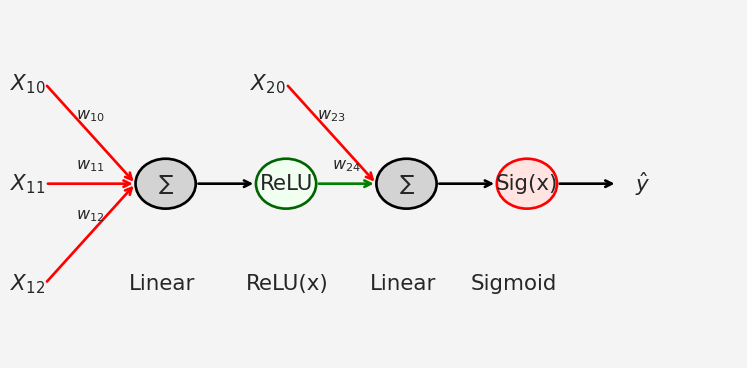

So our model

In [3]:
import torch.nn as nn

ANN_classifier = nn.Sequential(
    nn.Linear(2,1),                 # Input layer mapping R^2--> R
    nn.ReLU(),                      # Activation function in layer 1
    nn.Linear(1,1),                 # Output layer
    nn.Sigmoid()                    # Activation function in layer 2
)

Now let’s train the model

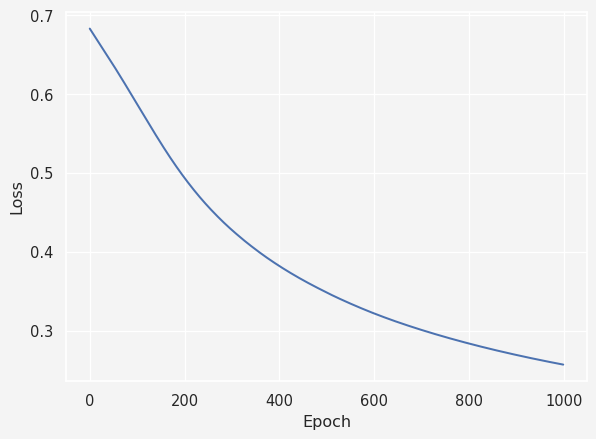

In [4]:
lr = 0.01                           # Learning Rate
loss_function = nn.BCELoss()        # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(        # Stochastic Gradient Descent Optimizer
    ANN_classifier.parameters(),
    lr=lr
)
num_epochs = 1000                   # Number of Epochs

# Define losses to store the loss from each epoch
losses = torch.zeros(num_epochs)
for epoch in range(num_epochs):
    # Forward Pass
    pred = ANN_classifier(data)

    # Compute loss
    loss = loss_function(pred, labels)
    losses[epoch] = loss 

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(losses.detach())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Next we compute the predictions made the model

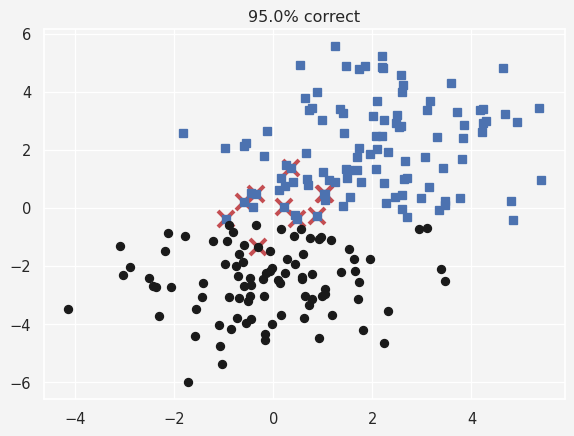

In [5]:
preds = ANN_classifier(data)
predicted_labels = preds>0.5
mis_classification = np.where(predicted_labels != labels)[0]
acc = 100 - 100*len(mis_classification)/(2*100)
plt.plot(
    data[mis_classification,0], data[mis_classification,1],
    'rx', markersize=12, markeredgewidth=3
)
plt.plot(
    data[np.where(~predicted_labels)[0],0],
    data[np.where(~predicted_labels)[0],1],'bs'
)
plt.plot(
    data[np.where(predicted_labels)[0],0],
    data[np.where(predicted_labels)[0],1],'ko'
)
plt.title(f'{acc}% correct')
plt.show()

## Multiclass Classification

We use the IRIS data for this project

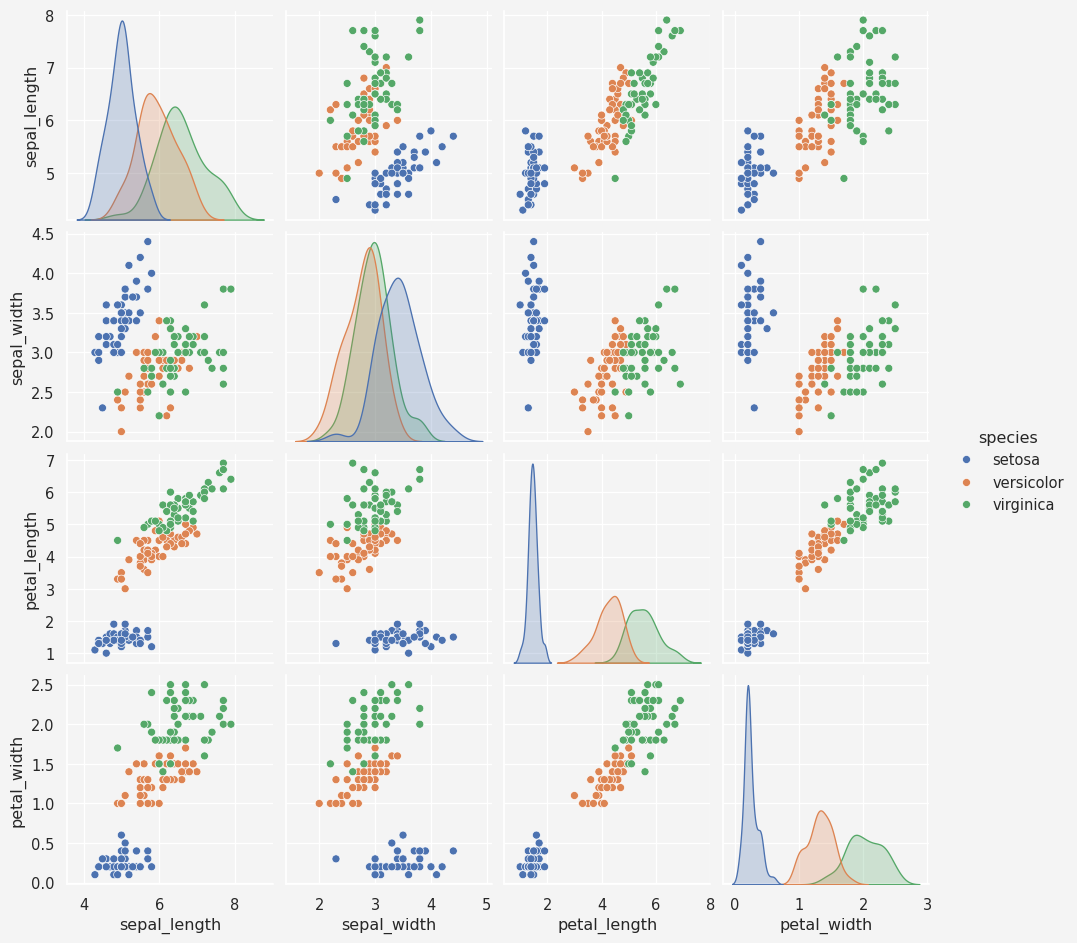

In [6]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.show()

### Data Pre-process

In [7]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2

Model

In [8]:
iris_classifier = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)
)
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(iris_classifier.parameters(), lr=0.01)

Training

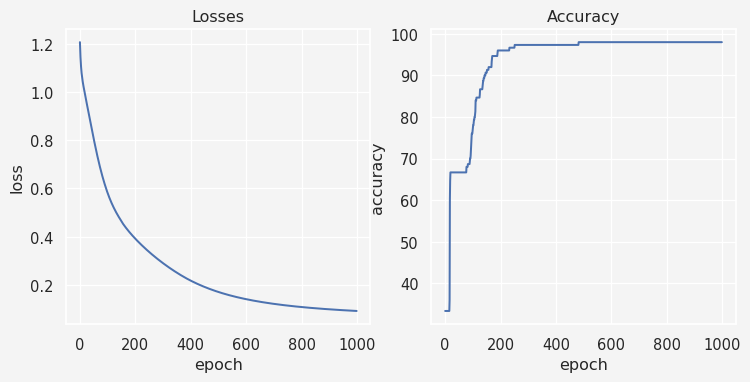

In [9]:
num_epochs = 1000
losses = torch.zeros(num_epochs)
running_acc = []

for epoch in range(num_epochs):
    # forward pass
    yhat = iris_classifier(data)
    # compute loss
    loss = loss_fun(yhat, labels)
    losses[epoch] = loss

    # back-prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # accuracy 
    matches = torch.argmax(yhat, axis=1)==labels
    matchesNum = matches.float()
    acc = 100*torch.mean(matchesNum)
    running_acc.append(acc)

# Model prediction
preds = iris_classifier(data)
predicted_labels = torch.argmax(preds, axis=1)
totalacc = 100*torch.mean((predicted_labels==labels).float())

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].plot(losses.detach())
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(running_acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()